#Sample iPython Notebook

By [Sebastian Raschka](http://www.sebastianraschka.com)  


In [12]:
import time
import sys
print('Last updated: %s' %time.strftime('%d/%m/%Y'))
print(sys.version)

Last updated: 06/06/2015
3.4.3 |Anaconda 2.2.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]


# An exhibit of Markdown

This note demonstrates some of what [Markdown][1] is capable of doing.

*Note: Feel free to play with this page. Unlike regular notes, this doesn't automatically save itself.*

## Basic formatting

Paragraphs can be written like so. A paragraph is the basic block of Markdown. A paragraph is what text will turn into when there is no reason it should become anything else.

Paragraphs must be separated by a blank line. Basic formatting of *italics* and **bold** is supported. This *can be **nested** like* so.

## Lists

### Ordered list

1. Item 1
2. A second item
3. Number 3
4. Ⅳ

*Note: the fourth item uses the Unicode character for [Roman numeral four][2].*

### Unordered list

* An item
* Another item
* Yet another item
* And there's more...

## Paragraph modifiers

### Code block

    Code blocks are very useful for developers and other people who look at code or other things that are written in plain text. As you can see, it uses a fixed-width font.

You can also make `inline code` to add code into other things.

### Quote

> Here is a quote. What this is should be self explanatory. Quotes are automatically indented when they are used.

## Headings

There are six levels of headings. They correspond with the six levels of HTML headings. You've probably noticed them already in the page. Each level down uses one more hash character.

### Headings *can* also contain **formatting**

### They can even contain `inline code`

Of course, demonstrating what headings look like messes up the structure of the page.

I don't recommend using more than three or four levels of headings here, because, when you're smallest heading isn't too small, and you're largest heading isn't too big, and you want each size up to look noticeably larger and more important, there there are only so many sizes that you can use.

## URLs

URLs can be made in a handful of ways:

* A named link to [MarkItDown][3]. The easiest way to do these is to select what you want to make a link and hit `Ctrl+L`.
* Another named link to [MarkItDown](http://www.markitdown.net/)
* Sometimes you just want a URL like <http://www.markitdown.net/>.

## Horizontal rule

A horizontal rule is a line that goes across the middle of the page.

---

It's sometimes handy for breaking things up.

## Images

Markdown can also contain images. I'll need to add something here sometime.

## Finally

There's actually a lot more to Markdown than this. See the official [introduction][4] and [syntax][5] for more information. However, be aware that this is not using the official implementation, and this might work subtly differently in some of the little things.


  [1]: http://daringfireball.net/projects/markdown/
  [2]: http://www.fileformat.info/info/unicode/char/2163/index.htm
  [3]: http://www.markitdown.net/
  [4]: http://daringfireball.net/projects/markdown/basics
  [5]: http://daringfireball.net/projects/markdown/syntax

# Linear regression via the least squares fit method

## Sections

- [Introduction](#Introduction)

- [Least squares fit implementations](#Least-squares-fit-implementations)

    - [The matrix approach in Python and NumPy](#The-matrix-approach-in-Python-and-NumPy)
    
    - [The classic approach in Python](#The-classic-approach-in-Python)
    
- [Visualization](#Visualization)

- [Performance growth rates](#Performance-growth-rates)

- [Results](#Results)

# Introduction

Linear regression via the least squares method is the simplest approach to performing a regression analysis of a dependent and a explanatory variable. The objective is to find the best-fitting straight line through a set of points that minimizes the sum of the squared offsets from the line.  
The offsets come in 2 different flavors: perpendicular and vertical - with respect to the line.  
![](https://raw.githubusercontent.com/rasbt/python_reference/master/Images/least_squares_vertical.png)  
![](https://raw.githubusercontent.com/rasbt/python_reference/master/Images/least_squares_perpendicular.png)  

As Michael Burger summarizes it nicely in his article "[Problems of Linear Least Square Regression - And Approaches to Handle Them](http://www.arsa-conf.com/archive/?vid=1&aid=2&kid=60101-220)": "the perpendicular offset method delivers a more precise result but is are more complicated to handle. Therefore normally the vertical offsets are used."  
Here, we will also use the method of computing the vertical offsets.



In more mathematical terms, our goal is to compute the best fit to *n* points $(x_i, y_i)$ with $i=1,2,...n,$ via linear equation of the form  
$f(x) = a\cdot x + b$.  
We further have to assume that the y-component is  functionally dependent on the x-component.  
In a cartesian coordinate system, $b$ is the intercept of the straight line with the y-axis, and $a$ is the slope of this line.

In order to obtain the parameters for the linear regression line for a set of multiple points, we can re-write the problem as matrix equation  
$\pmb X \; \pmb a = \pmb y$

$\Rightarrow\Bigg[ \begin{array}{cc}
x_1 & 1  \\
... & 1 \\
x_n & 1  \end{array} \Bigg]$
$\bigg[ \begin{array}{c}
a  \\
b \end{array} \bigg]$
$=\Bigg[ \begin{array}{c}
y_1   \\
...  \\
y_n  \end{array} \Bigg]$

With a little bit of calculus, we can rearrange the term in order to obtain the parameter vector $\pmb a = [a\;b]^T$

$\Rightarrow \pmb a = (\pmb X^T \; \pmb X)^{-1} \pmb X^T \; \pmb y$

<br>
The more classic approach to obtain the slope parameter $a$ and y-axis intercept $b$ would be:

$a = \frac{S_{x,y}}{\sigma_{x}^{2}}\quad$  (slope)


$b = \bar{y} - a\bar{x}\quad$ (y-axis intercept)

where 


$S_{xy} = \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})\quad$ (covariance)


$\sigma{_x}^{2} = \sum_{i=1}^{n} (x_i - \bar{x})^2\quad$ (variance)

# Least squares fit implementations

### The matrix approach in Python and NumPy

First, let us implement the equation:

$\pmb a = (\pmb X^T \; \pmb X)^{-1} \pmb X^T \; \pmb y$

which I will refer to as the "matrix approach".

#### Matrix approach implemented in NumPy and (C)Python

In [13]:
import numpy as np

def matrix_lstsqr(x, y):
    """ Computes the least-squares solution to a linear matrix equation. """
    X = np.vstack([x, np.ones(len(x))]).T
    return (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)

### The classic approach in Python

Next, we will calculate the parameters separately, using standard library functions in Python only, which I will call the "classic approach".

$a = \frac{S_{x,y}}{\sigma_{x}^{2}}\quad$  (slope)


$b = \bar{y} - a\bar{x}\quad$ (y-axis intercept)

Note: I refrained from using list comprehensions and convenience functions such as `zip()` in
order to maximize the performance for the Cython compilation into C code in the later sections.
    

#### Implemented in (C)Python

In [14]:
def classic_lstsqr(x_list, y_list):
    """ Computes the least-squares solution to a linear matrix equation. """
    N = len(x_list)
    x_avg = sum(x_list)/N
    y_avg = sum(y_list)/N
    var_x, cov_xy = 0, 0
    for x,y in zip(x_list, y_list):
        temp = x - x_avg
        var_x += temp**2
        cov_xy += temp * (y - y_avg)
    slope = cov_xy / var_x
    y_interc = y_avg - slope*x_avg
    return (slope, y_interc)

## Visualization

To check how our dataset is distributed, and how the least squares regression line looks like, we will plot the results in a scatter plot.  
Note that we are only using our "matrix approach" to visualize the results - for simplicity. We expect both approaches to produce similar results, which we confirm with the code snippet below.

In [15]:
import random
import numpy as np

random.seed(12345)

x = [x_i*random.randrange(8,12)/10 for x_i in range(500)]
y = [y_i*random.randrange(8,12)/10 for y_i in range(100,600)]

np.testing.assert_almost_equal(
    classic_lstsqr(x, y), matrix_lstsqr(x, y), decimal=5)  
    
print('ok')

ok


In [16]:
%matplotlib inline

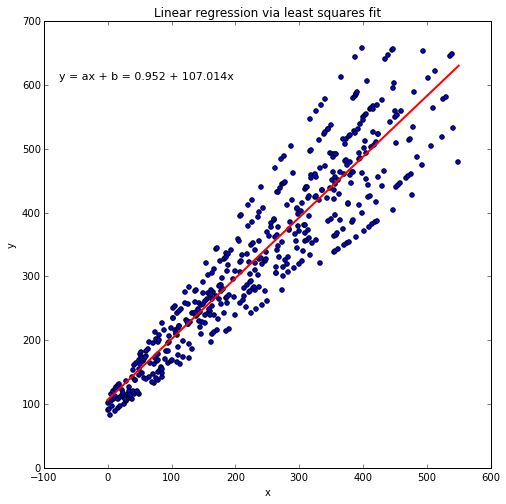

In [17]:
from matplotlib import pyplot as plt
import random

random.seed(12345)

x = [x_i*random.randrange(8,12)/10 for x_i in range(500)]
y = [y_i*random.randrange(8,12)/10 for y_i in range(100,600)]

slope, intercept = matrix_lstsqr(x, y)

line_x = [round(min(x)) - 1, round(max(x)) + 1]
line_y = [slope*x_i + intercept for x_i in line_x]

plt.figure(figsize=(8,8))
plt.scatter(x,y)
plt.plot(line_x, line_y, color='red', lw='2')

plt.ylabel('y')
plt.xlabel('x')
plt.title('Linear regression via least squares fit')

ftext = 'y = ax + b = {:.3f} + {:.3f}x'\
        .format(slope, intercept)
plt.figtext(.15,.8, ftext, fontsize=11, ha='left')

plt.show()

# Performance growth rates

Now, finally let us take a look at the effect of different sample sizes on the relative performances for each approach.

In [18]:
import timeit
import random
random.seed(12345)

funcs =  ['classic_lstsqr', 'matrix_lstsqr']

orders_n = [10**n for n in range(1,5)]
timings = {f:[] for f in funcs}

for n in orders_n:
    x_list = ([x_i*np.random.randint(8,12)/10 for x_i in range(n)])
    y_list = ([y_i*np.random.randint(10,14)/10 for y_i in range(n)])
    x_ary = np.asarray(x_list)
    y_ary = np.asarray(y_list)
    timings['classic_lstsqr'].append(min(timeit.Timer('classic_lstsqr(x_list, y_list)', 
            'from __main__ import classic_lstsqr, x_list, y_list')\
                                         .repeat(repeat=3, number=1000)))
    timings['matrix_lstsqr'].append(min(timeit.Timer('matrix_lstsqr(x_ary, y_ary)', 
            'from __main__ import matrix_lstsqr, x_ary, y_ary')\
                                         .repeat(repeat=3, number=1000)))

In [19]:
import platform
import multiprocessing

def print_sysinfo():
    
    print('\nPython version  :', platform.python_version())
    print('compiler        :', platform.python_compiler())
    print('NumPy version   :', np.__version__)
    
    print('\nsystem     :', platform.system())
    print('release    :', platform.release())
    print('machine    :', platform.machine())
    print('processor  :', platform.processor())
    print('CPU count  :', multiprocessing.cpu_count())
    print('interpreter:', platform.architecture()[0])
    print('\n\n')

In [20]:
import matplotlib.pyplot as plt

def plot(timings, title, labels, orders_n):
    plt.rcParams.update({'font.size': 12})

    fig = plt.figure(figsize=(11,10))
    for lb in labels:
        plt.plot(orders_n, timings[lb], alpha=0.5, label=labels[lb], 
                 marker='o', lw=3)
    plt.xlabel('sample size n')
    plt.ylabel('time per computation in milliseconds')
    #plt.xlim([min(orders_n) / 10, max(orders_n)* 10])
    plt.legend(loc=2)
    plt.grid()
    plt.xscale('log')
    plt.yscale('log')
    plt.title(title)
    plt.show()

# Results


Python version  : 3.4.3
compiler        : GCC 4.2.1 (Apple Inc. build 5577)
NumPy version   : 1.9.2

system     : Darwin
release    : 14.3.0
machine    : x86_64
processor  : i386
CPU count  : 8
interpreter: 64bit





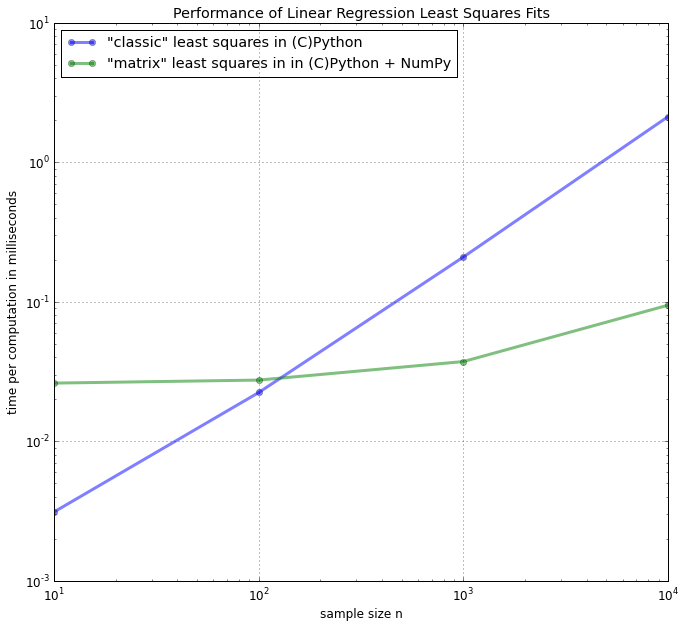

In [21]:
title = 'Performance of Linear Regression Least Squares Fits'

labels = {'classic_lstsqr': '"classic" least squares in (C)Python',
          'matrix_lstsqr': '"matrix" least squares in in (C)Python + NumPy',
         }

print_sysinfo()
plot(timings, title, labels, orders_n)